In [1]:
import pandas as pd

In [14]:
df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [15]:
# 데이터 추출
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [21]:
bream_df = df[df['Species'] == 'Bream']

bream_length = bream_df['Length2'].to_list()
bream_weight = bream_df['Weight'].to_list()

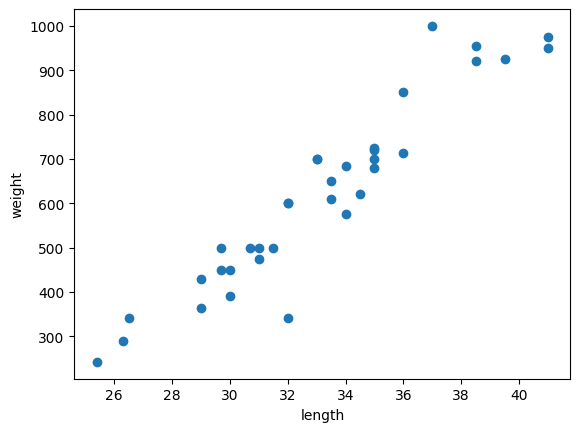

In [24]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [26]:
smelt_df = df[df['Species'] == 'Smelt']

In [28]:
smelt_length = smelt_df['Length2'].to_list()
smelt_weight = smelt_df['Weight'].to_list()

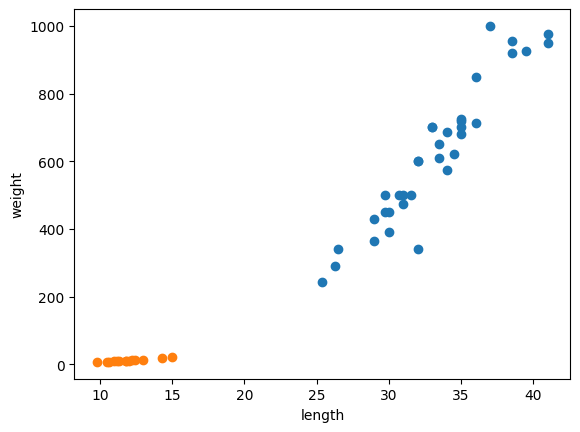

In [31]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [33]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [38]:
# 길이 + 무게 데이터 묶기 -> 도미1 (길이, 무게)
fish_data = [[l, w] for l, w in zip(length, weight)]

In [40]:
# 도미, 빙어 데이터 타켓 분리
target_data = [1] * len(bream_length) + [0] * len(smelt_length)

In [42]:
pip install scikit-learn

  Using cached scikit_learn-1.5.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (12 kB)
  Using cached scipy-1.14.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.1-cp312-cp312-macosx_12_0_arm64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.0-cp312-cp312-macosx_12_0_arm64.whl (29.9 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
kn = KNeighborsClassifier()

In [45]:
# 학습을 위해 (저장 데이터, 정답 데이터)를 주어 학습 진행
kn.fit(fish_data, target_data)

KNeighborsClassifier()

In [46]:
kn.score(fish_data, target_data)

1.0

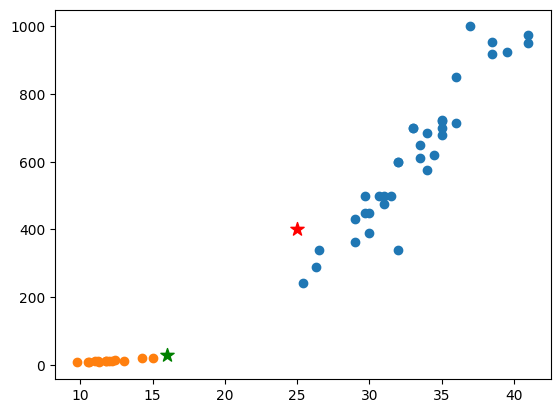

In [58]:
plt.scatter(bream_length, bream_weight) # 도미변수 시각화
plt.scatter(25, 400, c='r', s=100, marker='*') # 예측변수 시각화
plt.scatter(16, 30, c='g', s=100, marker='*')
plt.scatter(smelt_length, smelt_weight) # 빙어변수 시각화
plt.show()

In [61]:
# 예측값 1 => 도미, 예측값 0 => 빙어
print(kn.predict([[25, 400]]))
print(kn.predict([[16, 30]]))

[1]
[0]


In [62]:
kn._fit_X

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [64]:
#정답지
kn._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [66]:
kn49 = KNeighborsClassifier(49)

In [67]:
kn49.fit(fish_data, target_data)

KNeighborsClassifier(n_neighbors=49)

In [68]:
kn49.score(fish_data, target_data)

0.7142857142857143

In [70]:
#overfitting이 발생하는 순간 찾기
kn = KNeighborsClassifier()
kn.fit(fish_data, target_data)

for n in range(5, 50):
    kn.n_neighbors = n

    score = kn.score(fish_data, target_data)

    print(n, score)
    if score < 1 :
        break

5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 0.9795918367346939


In [8]:
import seaborn as sns

1. 데이터 가져오기
2. data에서 어떤 특성(변수)를 사용할지 결정
3. kn학습
4. matplotlib을 통해 시각화
5. 예측

In [20]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
df.shape

(150, 5)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [24]:
setosa_df = df[df['species']=='setosa']
versicolor_df = df[df['species']=='versicolor']
virginica_df = df[df['species']=='virginica']

In [25]:
setosa_df['length'] = df['sepal_length'] * df['petal_length']
setosa_df['width'] = df['sepal_width'] * df['petal_width']
versicolor_df['length'] = df['sepal_length'] * df['petal_length']
versicolor_df['width'] = df['sepal_width'] * df['petal_width']
virginica_df['length'] = df['sepal_length'] * df['petal_length']
virginica_df['width'] = df['sepal_width'] * df['petal_width']

/var/folders/40/58yhrb9d7q32wcxf8vbspv8h0000gn/T/ipykernel_87170/1108594376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  setosa_df['length'] = df['sepal_length'] * df['petal_length']
/var/folders/40/58yhrb9d7q32wcxf8vbspv8h0000gn/T/ipykernel_87170/1108594376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  setosa_df['width'] = df['sepal_width'] * df['petal_width']
/var/folders/40/58yhrb9d7q32wcxf8vbspv8h0000gn/T/ipykernel_87170/1108594376.py:3: SettingWithCopyWarning: 
A value is trying to be set 

In [26]:
setosa_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,length,width
0,5.1,3.5,1.4,0.2,setosa,7.14,0.70
1,4.9,3.0,1.4,0.2,setosa,6.86,0.60
2,4.7,3.2,1.3,0.2,setosa,6.11,0.64
3,4.6,3.1,1.5,0.2,setosa,6.90,0.62
4,5.0,3.6,1.4,0.2,setosa,7.00,0.72


In [34]:
setosa_length = setosa_df['length'].to_list()
setosa_width = setosa_df['width'].to_list()
versicolor_length = versicolor_df['length'].to_list()
versicolor_width = versicolor_df['width'].to_list()
virginica_length = virginica_df['length'].to_list()
virginica_width= virginica_df['width'].to_list()

In [35]:
target_data = [0] * len(setosa_length) + [1] * len(versicolor_length) + [2] * len(virginica_length)

In [37]:
length = setosa_length + versicolor_length + virginica_length
width = setosa_width + versicolor_width + virginica_width

In [38]:
iris_data = [[l, w] for l, w in zip(length, width)]

In [40]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [41]:
kn.fit(iris_data, target_data)

KNeighborsClassifier()

In [43]:
kn.score(iris_data, target_data)

0.9266666666666666

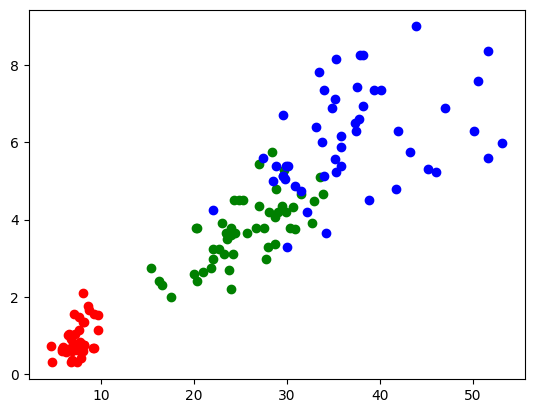

In [47]:
import matplotlib.pyplot as plt


plt.scatter(setosa_length, setosa_width, color='r') # setosa 시각화
plt.scatter(versicolor_length, versicolor_width, color='g') # versicolor 시각화
plt.scatter(virginica_length, virginica_width, color='b') # virginica 시각화
plt.show()

In [48]:
length2 = setosa_length + virginica_length
width2 = setosa_width + virginica_width

In [49]:
iris_data2 = [[l, w] for l, w in zip(length2, width2)]

In [50]:
target_data2 = [0] * len(setosa_length) + [1] * len(virginica_length)

In [51]:
kn.fit(iris_data2, target_data2)

KNeighborsClassifier()

In [53]:
kn.score(iris_data2, target_data2)

1.0

In [57]:
kn.predict([[1, 1]])

array([0])

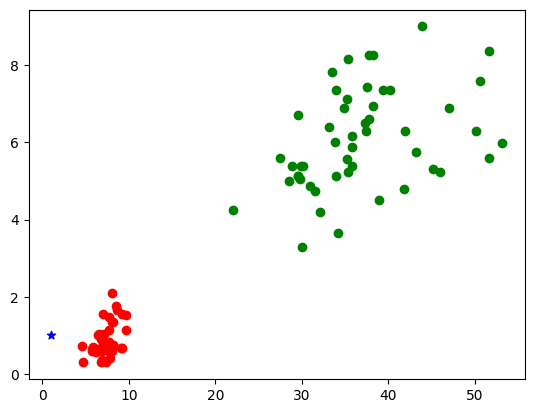

In [59]:
plt.scatter(setosa_length, setosa_width, color='r') # setosa 시각화
plt.scatter(virginica_length, virginica_width, color='g') # virginica 시각화
plt.scatter(1, 1, color='b', marker='*')
plt.show()